In [74]:
from pandas import read_csv
import numpy as np
import pandas as pd
from pandas import merge
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.initializers import Zeros, RandomNormal, glorot_uniform,RandomUniform
from tensorflow.keras.regularizers import l2,l1
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [5]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/brubiog/TIA/main/dataset.csv'
dataset_completo = read_csv(url,sep=";")

In [6]:
#Veamos las filas y columnas del dataset
dataset_completo.shape

(4424, 37)

In [7]:
#Veamos qué tipo de información contiene
dataset_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Marital status                                  4424 non-null   int64 
 1   Application mode                                4424 non-null   int64 
 2   Application order                               4424 non-null   int64 
 3   Course                                          4424 non-null   int64 
 4   Daytime/evening attendance	                     4424 non-null   int64 
 5   Previous qualification                          4424 non-null   int64 
 6   Previous qualification (grade)                  4424 non-null   object
 7   Nacionality                                     4424 non-null   int64 
 8   Mother's qualification                          4424 non-null   int64 
 9   Father's qualification                          4424

In [8]:
#Vamos a ver las clases de cada una de nuestras variables object
print(dataset_completo.groupby('Target').size())

Target
Dropout     1421
Enrolled     794
Graduate    2209
dtype: int64


In [9]:
print(dataset_completo.head(10))

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   
6               1                 1                  1    9500   
7               1                18                  4    9254   
8               1                 1                  3    9238   
9               1                 1                  1    9238   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1      

In [10]:

#Transformamos los datos: convertimos las categorías a numéricas para poder modelar
data_mapped = {"Target": {"Dropout":0.0, "Graduate":1.0, "Enrolled":1.0}}
dataset_completo=dataset_completo.replace(data_mapped)
for column in dataset_completo.columns:
    if dataset_completo[column].dtype == 'object':

        dataset_completo[column] =dataset_completo[column].str.replace(',', '.').astype(float)

print(dataset_completo)


      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

In [11]:
#Vemos si hay nulos
dataset_completo.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [12]:
#Veamos si hay registros duplicados
duplicados = dataset_completo.duplicated()
numero_duplicados = duplicados.sum()
print("Número de registros duplicados:", numero_duplicados)

Número de registros duplicados: 0


In [13]:
#Calculamos los estadísticos más importantes
Stats = dataset_completo.describe()
Stats = Stats.transpose()
Stats

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.00,1.00,6.00
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.00,39.00,57.00
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.00,2.00,9.00
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.00,9556.00,9991.00
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.00,1.00,1.00
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.00,1.00,43.00
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.10,140.00,190.00
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.00,1.00,109.00
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.00,37.00,44.00
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.00,37.00,44.00


In [14]:
#sin enrolled con 8 neuronas una capa sigmoid

# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(8, activation='sigmoid', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())
])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=15, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/15
56/56 [==============================] - 1s 6ms/step - loss: 0.6422 - accuracy: 0.6759 - val_loss: 0.6034 - val_accuracy: 0.6904
Epoch 2/15
56/56 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.6759 - val_loss: 0.5572 - val_accuracy: 0.6904
Epoch 3/15
56/56 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.6759 - val_loss: 0.5216 - val_accuracy: 0.6904
Epoch 4/15
56/56 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7095 - val_loss: 0.4827 - val_accuracy: 0.7627
Epoch 5/15
56/56 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.7906 - val_loss: 0.4452 - val_accuracy: 0.8282
Epoch 6/15
56/56 [==============================] - 0s 3ms/step - loss: 0.4403 - accuracy: 0.8254 - val_loss: 0.4148 - val_accuracy: 0.8373
Epoch 7/15
56/56 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8457 - val_loss: 0.3914 - val_accuracy: 0.8475
Epoch 8/15


In [15]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())


28/28 - 0s - loss: 0.3276 - accuracy: 0.8678 - 51ms/epoch - 2ms/step

Test accuracy: 0.8677965998649597
28/28 [==============================] - 0s 1ms/step
[0.08151186 0.9184881 ]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


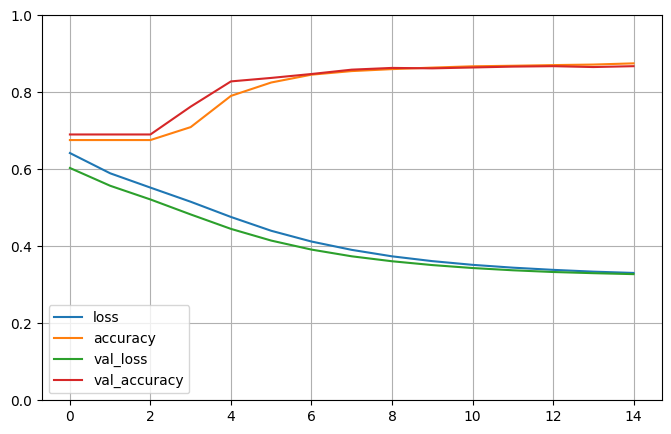

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
#sin enrolled con 8 neuronas una capa tanh


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(8, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())
])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=15, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/15
56/56 [==============================] - 1s 9ms/step - loss: 0.6476 - accuracy: 0.7454 - val_loss: 0.5727 - val_accuracy: 0.8203
Epoch 2/15
56/56 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.8186 - val_loss: 0.4370 - val_accuracy: 0.8429
Epoch 3/15
56/56 [==============================] - 0s 5ms/step - loss: 0.4077 - accuracy: 0.8460 - val_loss: 0.3721 - val_accuracy: 0.8565
Epoch 4/15
56/56 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.8576 - val_loss: 0.3445 - val_accuracy: 0.8655
Epoch 5/15
56/56 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.8683 - val_loss: 0.3325 - val_accuracy: 0.8678
Epoch 6/15
56/56 [==============================] - 0s 5ms/step - loss: 0.3289 - accuracy: 0.8731 - val_loss: 0.3272 - val_accuracy: 0.8734
Epoch 7/15
56/56 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.8745 - val_loss: 0.3237 - val_accuracy: 0.8746
Epoch 8/15


In [18]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())


28/28 - 0s - loss: 0.3159 - accuracy: 0.8757 - 58ms/epoch - 2ms/step

Test accuracy: 0.8757061958312988
28/28 [==============================] - 0s 1ms/step
[0.0679984 0.9320016]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


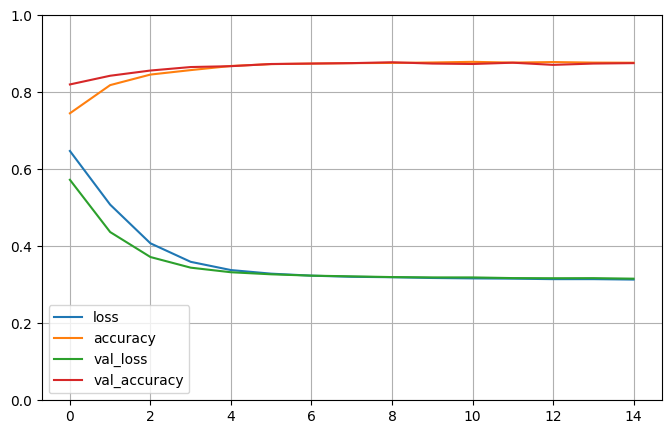

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [20]:
#sin enrolled con 16 neuronas una capa sigmoid


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(16, activation='sigmoid', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())
])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=30, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/30
56/56 [==============================] - 1s 5ms/step - loss: 0.6358 - accuracy: 0.6572 - val_loss: 0.5834 - val_accuracy: 0.6904
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.6767 - val_loss: 0.5253 - val_accuracy: 0.6949
Epoch 3/30
56/56 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7434 - val_loss: 0.4665 - val_accuracy: 0.7977
Epoch 4/30
56/56 [==============================] - 0s 3ms/step - loss: 0.4528 - accuracy: 0.8104 - val_loss: 0.4203 - val_accuracy: 0.8362
Epoch 5/30
56/56 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8432 - val_loss: 0.3877 - val_accuracy: 0.8452
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8550 - val_loss: 0.3665 - val_accuracy: 0.8565
Epoch 7/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8607 - val_loss: 0.3515 - val_accuracy: 0.8621
Epoch 8/30


In [21]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

28/28 - 0s - loss: 0.3154 - accuracy: 0.8768 - 52ms/epoch - 2ms/step

Test accuracy: 0.8768361806869507
28/28 [==============================] - 0s 1ms/step
[0.07171673 0.9282833 ]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


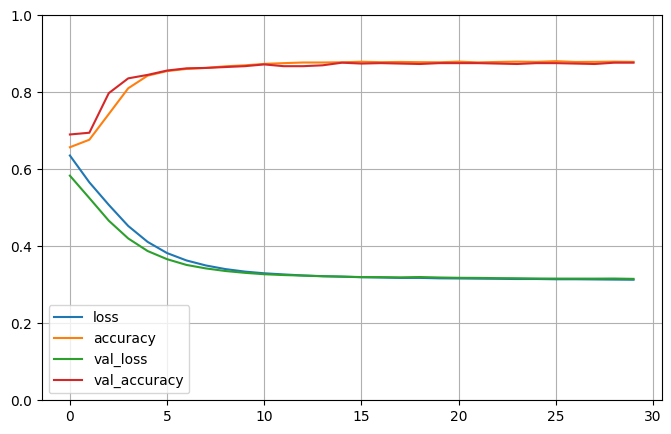

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [23]:
#sin enrolled con 16 neuronas una capa tanh


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(16, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())
])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=30, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/30
56/56 [==============================] - 1s 6ms/step - loss: 0.5936 - accuracy: 0.7773 - val_loss: 0.4899 - val_accuracy: 0.8181
Epoch 2/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8316 - val_loss: 0.3805 - val_accuracy: 0.8588
Epoch 3/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8576 - val_loss: 0.3428 - val_accuracy: 0.8678
Epoch 4/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.8680 - val_loss: 0.3314 - val_accuracy: 0.8701
Epoch 5/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8745 - val_loss: 0.3273 - val_accuracy: 0.8701
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8762 - val_loss: 0.3245 - val_accuracy: 0.8712
Epoch 7/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8751 - val_loss: 0.3236 - val_accuracy: 0.8655
Epoch 8/30


In [24]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

28/28 - 0s - loss: 0.3083 - accuracy: 0.8791 - 57ms/epoch - 2ms/step

Test accuracy: 0.8790960311889648
28/28 [==============================] - 0s 1ms/step
[0.06996284 0.93003714]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


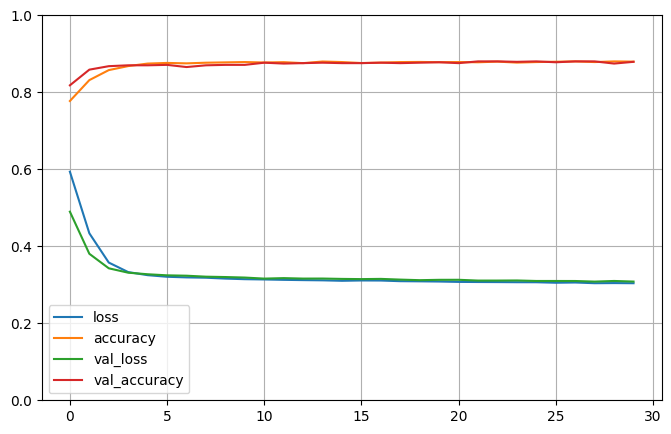

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
#sin enrolled con 16 neuronas una capa relu

# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())
])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=30, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/30
56/56 [==============================] - 1s 6ms/step - loss: 0.6495 - accuracy: 0.7369 - val_loss: 0.5694 - val_accuracy: 0.8271
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.8307 - val_loss: 0.4091 - val_accuracy: 0.8508
Epoch 3/30
56/56 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.8567 - val_loss: 0.3532 - val_accuracy: 0.8701
Epoch 4/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8680 - val_loss: 0.3356 - val_accuracy: 0.8746
Epoch 5/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8709 - val_loss: 0.3266 - val_accuracy: 0.8757
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8717 - val_loss: 0.3241 - val_accuracy: 0.8757
Epoch 7/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8760 - val_loss: 0.3218 - val_accuracy: 0.8780
Epoch 8/30


In [27]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

28/28 - 0s - loss: 0.3121 - accuracy: 0.8791 - 52ms/epoch - 2ms/step

Test accuracy: 0.8790960311889648
28/28 [==============================] - 0s 1ms/step
[0.05804912 0.941951  ]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


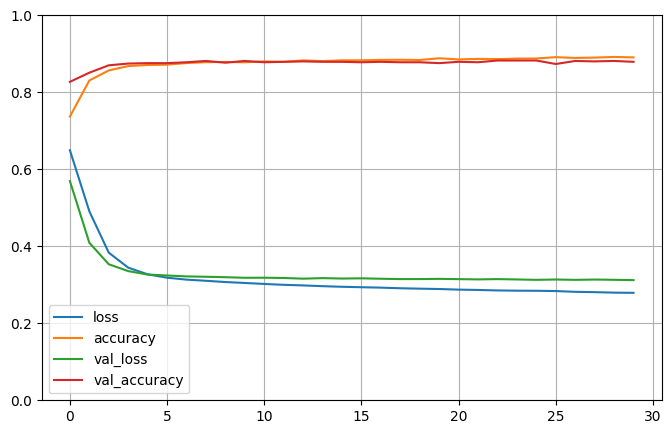

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
#sin enrolled con 16 neuronas una capa relu con dropout


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dropout(0,2),
    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=40, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/40
56/56 [==============================] - 1s 6ms/step - loss: 0.6262 - accuracy: 0.7683 - val_loss: 0.5339 - val_accuracy: 0.8463
Epoch 2/40
56/56 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.8401 - val_loss: 0.3940 - val_accuracy: 0.8588
Epoch 3/40
56/56 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8613 - val_loss: 0.3466 - val_accuracy: 0.8712
Epoch 4/40
56/56 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8689 - val_loss: 0.3313 - val_accuracy: 0.8746
Epoch 5/40
56/56 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 0.8700 - val_loss: 0.3254 - val_accuracy: 0.8791
Epoch 6/40
56/56 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.8728 - val_loss: 0.3223 - val_accuracy: 0.8768
Epoch 7/40
56/56 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8745 - val_loss: 0.3204 - val_accuracy: 0.8780
Epoch 8/40


In [30]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

28/28 - 0s - loss: 0.3207 - accuracy: 0.8746 - 51ms/epoch - 2ms/step

Test accuracy: 0.8745762705802917
28/28 [==============================] - 0s 1ms/step
[0.04579436 0.95420563]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


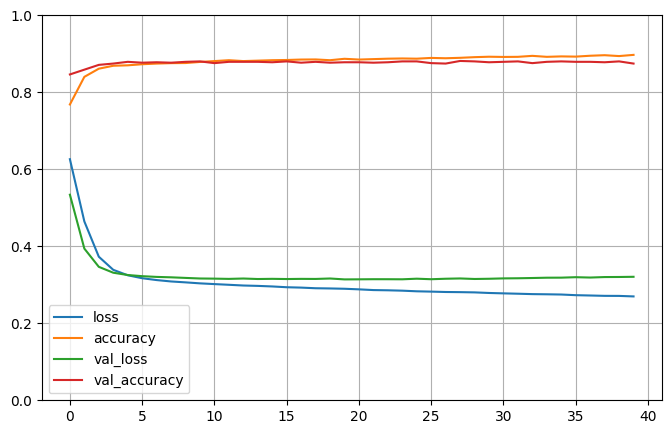

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
#sin enrolled con 16 neuronas una capa relu con L2


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal(),kernel_regularizer=l2(0.001)),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal(),kernel_regularizer=l2(0.001))

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=30, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/30
56/56 [==============================] - 2s 12ms/step - loss: 0.6337 - accuracy: 0.7516 - val_loss: 0.5386 - val_accuracy: 0.8362
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.8341 - val_loss: 0.3980 - val_accuracy: 0.8554
Epoch 3/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3816 - accuracy: 0.8579 - val_loss: 0.3535 - val_accuracy: 0.8610
Epoch 4/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.8661 - val_loss: 0.3354 - val_accuracy: 0.8644
Epoch 5/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.8683 - val_loss: 0.3289 - val_accuracy: 0.8734
Epoch 6/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8743 - val_loss: 0.3245 - val_accuracy: 0.8723
Epoch 7/30
56/56 [==============================] - 0s 4ms/step - loss: 0.3186 - accuracy: 0.8768 - val_loss: 0.3227 - val_accuracy: 0.8712
Epoch 8/30

In [33]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

28/28 - 0s - loss: 0.3206 - accuracy: 0.8734 - 55ms/epoch - 2ms/step

Test accuracy: 0.8734463453292847
28/28 [==============================] - 0s 2ms/step
[0.07257255 0.9274274 ]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


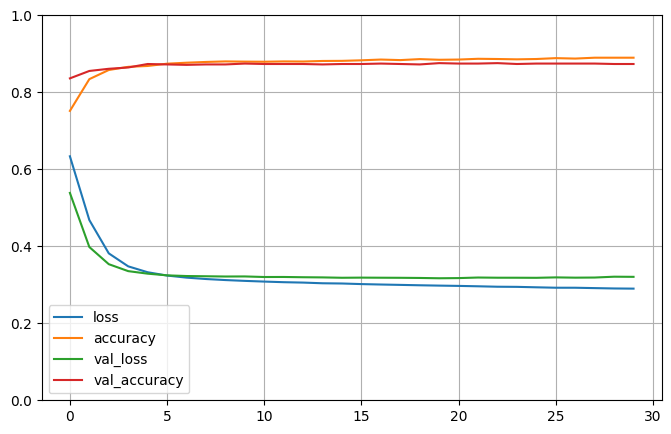

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
#sin enrolled con 16 neuronas una capa relu con L1


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal(),kernel_regularizer=l1(0.001)),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal(),kernel_regularizer=l1(0.001))

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=30, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/30
56/56 [==============================] - 1s 5ms/step - loss: 0.6554 - accuracy: 0.7417 - val_loss: 0.5696 - val_accuracy: 0.8305
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.8324 - val_loss: 0.4328 - val_accuracy: 0.8542
Epoch 3/30
56/56 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8596 - val_loss: 0.3815 - val_accuracy: 0.8667
Epoch 4/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 0.8678 - val_loss: 0.3641 - val_accuracy: 0.8723
Epoch 5/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8706 - val_loss: 0.3570 - val_accuracy: 0.8712
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8723 - val_loss: 0.3540 - val_accuracy: 0.8746
Epoch 7/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8748 - val_loss: 0.3509 - val_accuracy: 0.8723
Epoch 8/30


In [36]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

28/28 - 0s - loss: 0.3405 - accuracy: 0.8712 - 50ms/epoch - 2ms/step

Test accuracy: 0.8711864352226257
28/28 [==============================] - 0s 1ms/step
[0.06025644 0.93974364]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


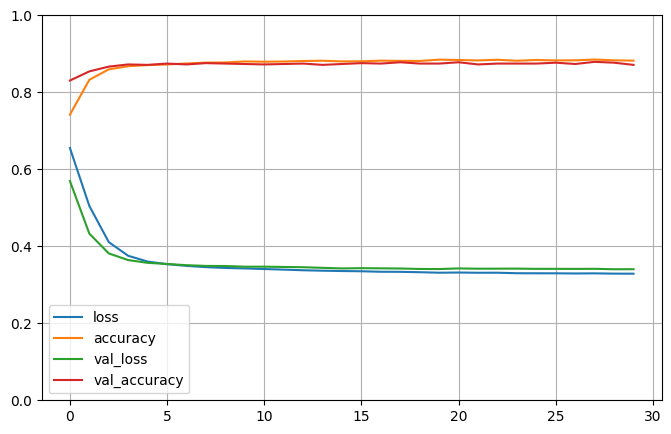

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
#sin enrolled con 32 neuronas dos capa sigmoid


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(32, activation='sigmoid', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dense(32, activation='sigmoid', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=30, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/30
56/56 [==============================] - 1s 6ms/step - loss: 0.6427 - accuracy: 0.6366 - val_loss: 0.6072 - val_accuracy: 0.6904
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.6054 - accuracy: 0.6759 - val_loss: 0.5722 - val_accuracy: 0.6904
Epoch 3/30
56/56 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.6968 - val_loss: 0.4936 - val_accuracy: 0.7718
Epoch 4/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8138 - val_loss: 0.4055 - val_accuracy: 0.8373
Epoch 5/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8525 - val_loss: 0.3612 - val_accuracy: 0.8621
Epoch 6/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.8613 - val_loss: 0.3410 - val_accuracy: 0.8667
Epoch 7/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8680 - val_loss: 0.3314 - val_accuracy: 0.8689
Epoch 8/30


In [39]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

28/28 - 0s - loss: 0.3155 - accuracy: 0.8757 - 54ms/epoch - 2ms/step

Test accuracy: 0.8757061958312988
28/28 [==============================] - 0s 1ms/step
[0.070963   0.92903703]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


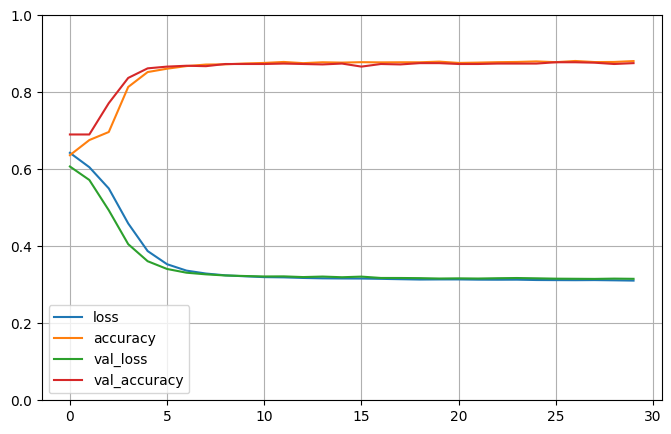

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
#sin enrolled con 32 neuronas dos capa tanh


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(32, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dropout(0.20),
    layers.Dense(32, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=30, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/30
56/56 [==============================] - 1s 6ms/step - loss: 0.5355 - accuracy: 0.8127 - val_loss: 0.3680 - val_accuracy: 0.8554
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8601 - val_loss: 0.3250 - val_accuracy: 0.8734
Epoch 3/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3314 - accuracy: 0.8695 - val_loss: 0.3201 - val_accuracy: 0.8712
Epoch 4/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8743 - val_loss: 0.3195 - val_accuracy: 0.8768
Epoch 5/30
56/56 [==============================] - 0s 4ms/step - loss: 0.3204 - accuracy: 0.8748 - val_loss: 0.3181 - val_accuracy: 0.8746
Epoch 6/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8760 - val_loss: 0.3180 - val_accuracy: 0.8768
Epoch 7/30
56/56 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8745 - val_loss: 0.3146 - val_accuracy: 0.8746
Epoch 8/30


In [42]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

28/28 - 0s - loss: 0.3081 - accuracy: 0.8825 - 110ms/epoch - 4ms/step

Test accuracy: 0.8824858665466309
28/28 [==============================] - 0s 2ms/step
[0.06765445 0.9323455 ]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


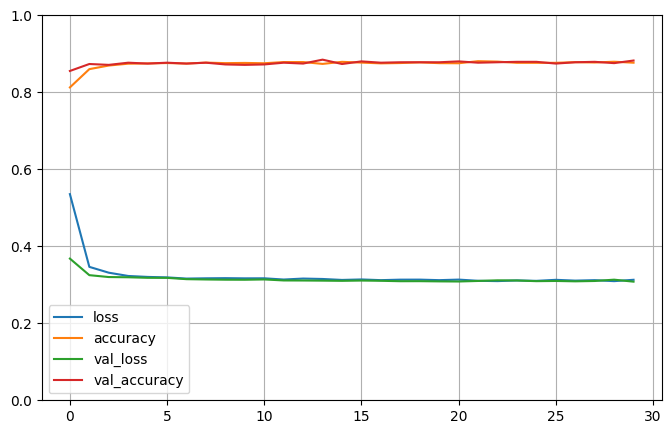

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
#sin enrolled con 32 neuronas dos capa relu


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dropout(0.20),
    layers.Dense(32, activation='relu', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=30, batch_size=64, validation_data=(X_validation1, Y_validation))

3539 885
Epoch 1/30
56/56 [==============================] - 2s 12ms/step - loss: 0.6108 - accuracy: 0.7259 - val_loss: 0.4412 - val_accuracy: 0.8395
Epoch 2/30
56/56 [==============================] - 0s 7ms/step - loss: 0.3827 - accuracy: 0.8471 - val_loss: 0.3303 - val_accuracy: 0.8768
Epoch 3/30
56/56 [==============================] - 0s 9ms/step - loss: 0.3340 - accuracy: 0.8683 - val_loss: 0.3168 - val_accuracy: 0.8757
Epoch 4/30
56/56 [==============================] - 0s 6ms/step - loss: 0.3203 - accuracy: 0.8737 - val_loss: 0.3147 - val_accuracy: 0.8802
Epoch 5/30
56/56 [==============================] - 0s 8ms/step - loss: 0.3138 - accuracy: 0.8748 - val_loss: 0.3126 - val_accuracy: 0.8802
Epoch 6/30
56/56 [==============================] - 0s 6ms/step - loss: 0.3084 - accuracy: 0.8748 - val_loss: 0.3141 - val_accuracy: 0.8791
Epoch 7/30
56/56 [==============================] - 0s 7ms/step - loss: 0.3015 - accuracy: 0.8825 - val_loss: 0.3105 - val_accuracy: 0.8825
Epoch 8/30

In [45]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

28/28 - 0s - loss: 0.3238 - accuracy: 0.8814 - 55ms/epoch - 2ms/step

Test accuracy: 0.8813559412956238
28/28 [==============================] - 0s 2ms/step
[0.04953314 0.95046693]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


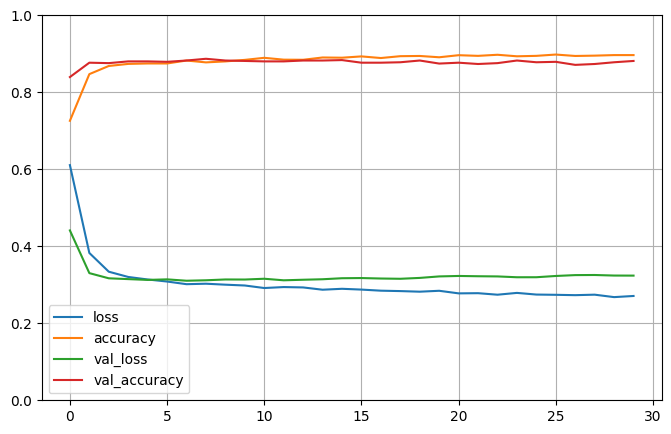

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [47]:
#sin enrolled con 16 neuronas dos capa sigmoid


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(16, activation='sigmoid', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(16, activation='sigmoid', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=10, batch_size=64, validation_data=(X_validation1, Y_validation))

3539 885
Epoch 1/10
56/56 [==============================] - 1s 6ms/step - loss: 0.6441 - accuracy: 0.6759 - val_loss: 0.6144 - val_accuracy: 0.6904
Epoch 2/10
56/56 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6759 - val_loss: 0.5957 - val_accuracy: 0.6904
Epoch 3/10
56/56 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.6759 - val_loss: 0.5617 - val_accuracy: 0.6904
Epoch 4/10
56/56 [==============================] - 0s 3ms/step - loss: 0.5474 - accuracy: 0.6759 - val_loss: 0.5025 - val_accuracy: 0.6904
Epoch 5/10
56/56 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7810 - val_loss: 0.4363 - val_accuracy: 0.8350
Epoch 6/10
56/56 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.8477 - val_loss: 0.3886 - val_accuracy: 0.8497
Epoch 7/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3791 - accuracy: 0.8587 - val_loss: 0.3602 - val_accuracy: 0.8633
Epoch 8/10


In [48]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

28/28 - 0s - loss: 0.3294 - accuracy: 0.8701 - 52ms/epoch - 2ms/step

Test accuracy: 0.8700565099716187
28/28 [==============================] - 0s 1ms/step
[0.07604211 0.9239579 ]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


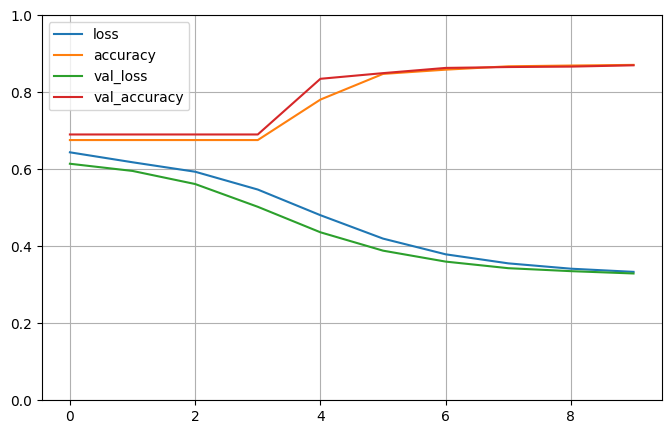

In [49]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
#sin enrolled con 16 neuronas dos capa tanh


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal
# se comporta bien con 128,64,64
#kernel_initializer=RandomNormal()
model = keras.Sequential([
    layers.Dense(16, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(16, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=10, batch_size=64, validation_data=(X_validation1, Y_validation))

3539 885
Epoch 1/10
56/56 [==============================] - 1s 6ms/step - loss: 0.5979 - accuracy: 0.7864 - val_loss: 0.4423 - val_accuracy: 0.8305
Epoch 2/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.8508 - val_loss: 0.3369 - val_accuracy: 0.8678
Epoch 3/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3291 - accuracy: 0.8689 - val_loss: 0.3225 - val_accuracy: 0.8667
Epoch 4/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.8743 - val_loss: 0.3211 - val_accuracy: 0.8746
Epoch 5/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3174 - accuracy: 0.8728 - val_loss: 0.3186 - val_accuracy: 0.8757
Epoch 6/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8779 - val_loss: 0.3165 - val_accuracy: 0.8746
Epoch 7/10
56/56 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8776 - val_loss: 0.3170 - val_accuracy: 0.8757
Epoch 8/10


In [51]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales

28/28 - 0s - loss: 0.3149 - accuracy: 0.8689 - 53ms/epoch - 2ms/step

Test accuracy: 0.8689265251159668
28/28 [==============================] - 0s 1ms/step
[0.06201051 0.93798953]
0


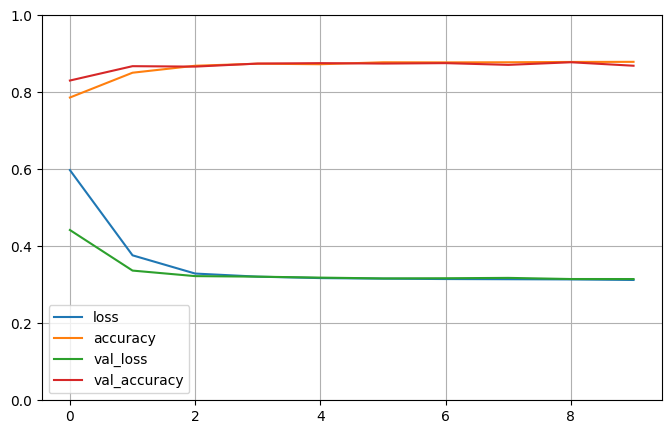

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
#sin enrolled con 16 neuronas dos capa relu


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(16, activation='relu', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=10, batch_size=64, validation_data=(X_validation1, Y_validation))

3539 885
Epoch 1/10
56/56 [==============================] - 1s 5ms/step - loss: 0.6498 - accuracy: 0.6982 - val_loss: 0.5472 - val_accuracy: 0.8079
Epoch 2/10
56/56 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8387 - val_loss: 0.3593 - val_accuracy: 0.8588
Epoch 3/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.8618 - val_loss: 0.3273 - val_accuracy: 0.8678
Epoch 4/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8734 - val_loss: 0.3213 - val_accuracy: 0.8701
Epoch 5/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8762 - val_loss: 0.3211 - val_accuracy: 0.8701
Epoch 6/10
56/56 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8771 - val_loss: 0.3181 - val_accuracy: 0.8734
Epoch 7/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3040 - accuracy: 0.8796 - val_loss: 0.3180 - val_accuracy: 0.8712
Epoch 8/10


In [54]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales

28/28 - 0s - loss: 0.3177 - accuracy: 0.8757 - 109ms/epoch - 4ms/step

Test accuracy: 0.8757061958312988
28/28 [==============================] - 0s 2ms/step
[0.04838382 0.9516161 ]
0


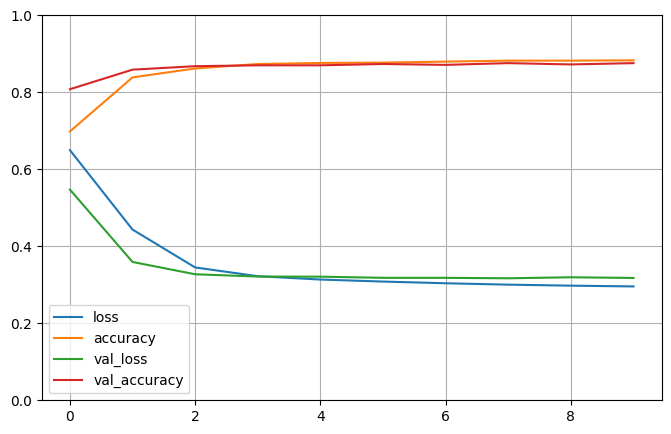

In [55]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [56]:
#sin enrolled con 8/16 neuronas dos capa sigmoid


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(8, activation='sigmoid', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(16, activation='sigmoid', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=10, batch_size=64, validation_data=(X_validation1, Y_validation))

3539 885
Epoch 1/10
56/56 [==============================] - 1s 7ms/step - loss: 0.6552 - accuracy: 0.6392 - val_loss: 0.6186 - val_accuracy: 0.6904
Epoch 2/10
56/56 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.6759 - val_loss: 0.6093 - val_accuracy: 0.6904
Epoch 3/10
56/56 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6759 - val_loss: 0.5927 - val_accuracy: 0.6904
Epoch 4/10
56/56 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.6759 - val_loss: 0.5658 - val_accuracy: 0.6904
Epoch 5/10
56/56 [==============================] - 0s 3ms/step - loss: 0.5609 - accuracy: 0.6759 - val_loss: 0.5269 - val_accuracy: 0.6904
Epoch 6/10
56/56 [==============================] - 0s 3ms/step - loss: 0.5154 - accuracy: 0.6759 - val_loss: 0.4776 - val_accuracy: 0.6960
Epoch 7/10
56/56 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.8062 - val_loss: 0.4311 - val_accuracy: 0.8373
Epoch 8/10


In [57]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales

28/28 - 0s - loss: 0.3533 - accuracy: 0.8655 - 57ms/epoch - 2ms/step

Test accuracy: 0.8655367493629456
28/28 [==============================] - 0s 1ms/step
[0.09546639 0.9045337 ]
0


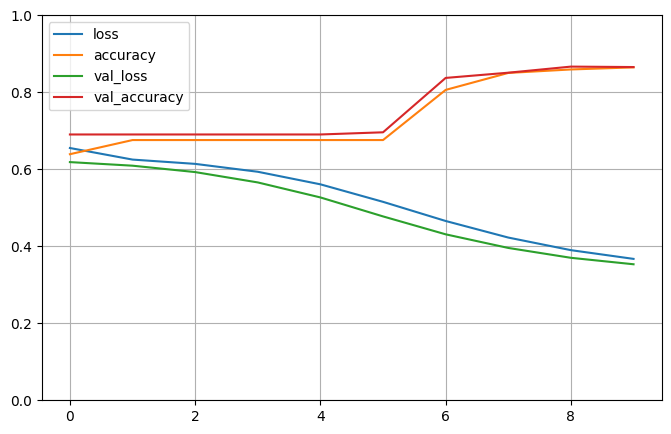

In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
#sin enrolled con 8/16 neuronas dos capa tanh


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(8, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(16, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=10, batch_size=64, validation_data=(X_validation1, Y_validation))

3539 885
Epoch 1/10
56/56 [==============================] - 1s 5ms/step - loss: 0.6405 - accuracy: 0.7542 - val_loss: 0.5199 - val_accuracy: 0.8339
Epoch 2/10
56/56 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8429 - val_loss: 0.3517 - val_accuracy: 0.8610
Epoch 3/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8655 - val_loss: 0.3292 - val_accuracy: 0.8655
Epoch 4/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8714 - val_loss: 0.3220 - val_accuracy: 0.8723
Epoch 5/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.8748 - val_loss: 0.3179 - val_accuracy: 0.8746
Epoch 6/10
56/56 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8771 - val_loss: 0.3174 - val_accuracy: 0.8723
Epoch 7/10
56/56 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8771 - val_loss: 0.3155 - val_accuracy: 0.8701
Epoch 8/10


In [60]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales

28/28 - 0s - loss: 0.3140 - accuracy: 0.8734 - 73ms/epoch - 3ms/step

Test accuracy: 0.8734463453292847
28/28 [==============================] - 0s 1ms/step
[0.07259886 0.9274011 ]
0


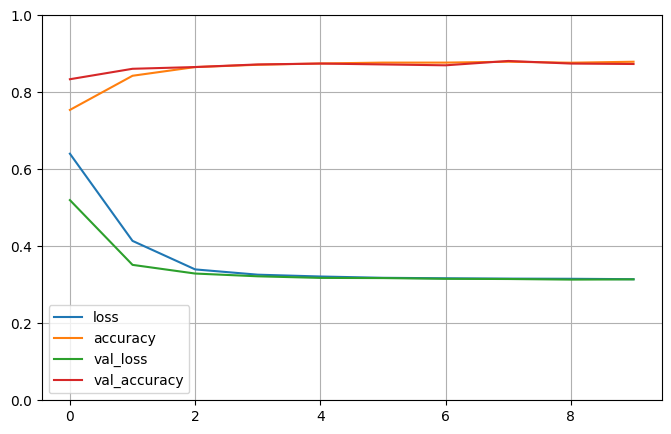

In [61]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [96]:
#sin enrolled con 32 neuronas dos capa  y una de 16 neuronas tanh y epoch 7


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(32, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(32, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dense(16, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=7, batch_size=64, validation_data=(X_validation1, Y_validation))

3539 885
Epoch 1/7
56/56 [==============================] - 3s 12ms/step - loss: 0.5612 - accuracy: 0.8005 - val_loss: 0.3751 - val_accuracy: 0.8542
Epoch 2/7
56/56 [==============================] - 0s 5ms/step - loss: 0.3452 - accuracy: 0.8607 - val_loss: 0.3239 - val_accuracy: 0.8723
Epoch 3/7
56/56 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.8776 - val_loss: 0.3213 - val_accuracy: 0.8746
Epoch 4/7
56/56 [==============================] - 0s 5ms/step - loss: 0.3205 - accuracy: 0.8737 - val_loss: 0.3192 - val_accuracy: 0.8746
Epoch 5/7
56/56 [==============================] - 1s 12ms/step - loss: 0.3192 - accuracy: 0.8745 - val_loss: 0.3166 - val_accuracy: 0.8746
Epoch 6/7
56/56 [==============================] - 0s 7ms/step - loss: 0.3167 - accuracy: 0.8796 - val_loss: 0.3124 - val_accuracy: 0.8802
Epoch 7/7
56/56 [==============================] - 0s 6ms/step - loss: 0.3161 - accuracy: 0.8785 - val_loss: 0.3165 - val_accuracy: 0.8791


In [97]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales

28/28 - 0s - loss: 0.3165 - accuracy: 0.8791 - 54ms/epoch - 2ms/step

Test accuracy: 0.8790960311889648
28/28 [==============================] - 0s 2ms/step
[0.05456904 0.9454308 ]
0


In [98]:
print(classification_report(Y_validation,predicted_classes))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       274
           1       0.89      0.94      0.92       611

    accuracy                           0.88       885
   macro avg       0.87      0.84      0.85       885
weighted avg       0.88      0.88      0.88       885



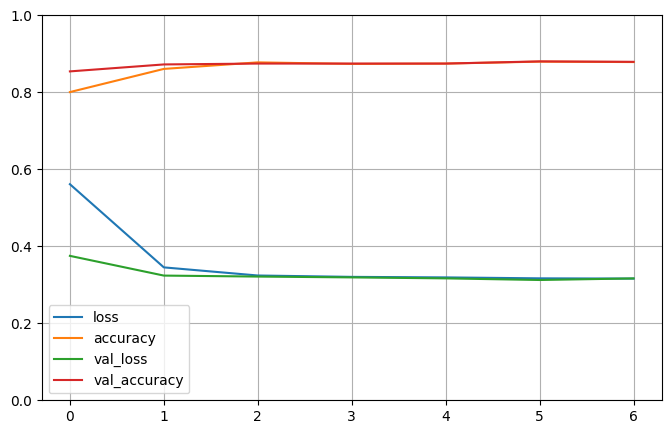

In [99]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [114]:
#sin enrolled con 16,32 y 16 neuronas capas tanh y epoch 7


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal

model = keras.Sequential([
    layers.Dense(16, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(32, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),
    layers.Dense(16, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())

])
# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=7, batch_size=64, validation_data=(X_validation1, Y_validation))

3539 885
Epoch 1/7
56/56 [==============================] - 2s 7ms/step - loss: 0.5890 - accuracy: 0.7861 - val_loss: 0.3940 - val_accuracy: 0.8463
Epoch 2/7
56/56 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8582 - val_loss: 0.3318 - val_accuracy: 0.8678
Epoch 3/7
56/56 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8712 - val_loss: 0.3240 - val_accuracy: 0.8701
Epoch 4/7
56/56 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8771 - val_loss: 0.3179 - val_accuracy: 0.8723
Epoch 5/7
56/56 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.8754 - val_loss: 0.3180 - val_accuracy: 0.8712
Epoch 6/7
56/56 [==============================] - 0s 4ms/step - loss: 0.3176 - accuracy: 0.8768 - val_loss: 0.3179 - val_accuracy: 0.8746
Epoch 7/7
56/56 [==============================] - 0s 5ms/step - loss: 0.3176 - accuracy: 0.8771 - val_loss: 0.3169 - val_accuracy: 0.8780


In [115]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales

28/28 - 0s - loss: 0.3169 - accuracy: 0.8780 - 53ms/epoch - 2ms/step

Test accuracy: 0.8779661059379578
28/28 [==============================] - 0s 1ms/step
[0.06167728 0.9383227 ]
0


In [116]:
print(classification_report(Y_validation,predicted_classes))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       274
           1       0.88      0.95      0.91       611

    accuracy                           0.88       885
   macro avg       0.87      0.83      0.85       885
weighted avg       0.88      0.88      0.87       885



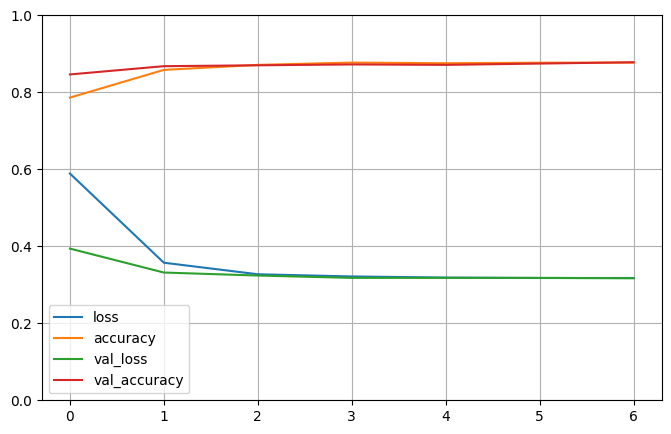

In [117]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [155]:
#sin enrolled con dos capas 32 neuronas tanh y epoch 7


# En la variable X es todos los datos menos la variable objetivo, y la y es la variable objetivo
X = dataset_completo.drop(columns=['Target'])
y = dataset_completo['Target']



# Reemplazar comas por puntos en todas las columnas de características si son strings
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x).astype('float32')

# Convertir la variable objetivo a tipo entero
y = y.astype('int')
# División del conjuntos de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


#Normalizamos los datos de entrenamiento de las variables de entrada
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_validation1 = scaler.transform(X_validation)

#Comprobamos la longitud de cada variable train y test
print(len(X_train),len(X_validation))
#Creamos la red neuronal
model = keras.Sequential([
    layers.Dense(32, activation='tanh', input_shape=(X_train1.shape[1],), kernel_initializer=RandomNormal()),

    layers.Dense(32, activation='tanh',kernel_initializer=RandomNormal() ),


    layers.Dense(2, activation='softmax',kernel_initializer=RandomNormal())
])


# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history=model.fit(X_train1, Y_train, epochs=12, batch_size=64, validation_data=(X_validation1, Y_validation))


3539 885
Epoch 1/12
56/56 [==============================] - 2s 10ms/step - loss: 0.5465 - accuracy: 0.7997 - val_loss: 0.3713 - val_accuracy: 0.8531
Epoch 2/12
56/56 [==============================] - 0s 5ms/step - loss: 0.3428 - accuracy: 0.8641 - val_loss: 0.3260 - val_accuracy: 0.8689
Epoch 3/12
56/56 [==============================] - 0s 5ms/step - loss: 0.3226 - accuracy: 0.8740 - val_loss: 0.3212 - val_accuracy: 0.8667
Epoch 4/12
56/56 [==============================] - 0s 5ms/step - loss: 0.3191 - accuracy: 0.8737 - val_loss: 0.3186 - val_accuracy: 0.8712
Epoch 5/12
56/56 [==============================] - 0s 5ms/step - loss: 0.3160 - accuracy: 0.8762 - val_loss: 0.3185 - val_accuracy: 0.8701
Epoch 6/12
56/56 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8748 - val_loss: 0.3191 - val_accuracy: 0.8667
Epoch 7/12
56/56 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8774 - val_loss: 0.3182 - val_accuracy: 0.8734
Epoch 8/12

In [156]:
# Evaluamos exactitud:
test_loss, test_acc = model.evaluate(X_validation1, Y_validation,verbose=2)
print("\nTest accuracy:", test_acc)
# Realizamos predicciones con el dataset de validación
predictions = model.predict(X_validation1)
print(predictions[1])
valor_nivel = np.argmax(predictions[0])
print(valor_nivel)

# Convertir predicciones a la misma forma que Y_validation
predicted_classes = np.argmax(predictions, axis=1)

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Actual': Y_validation,
    'Predicted': predicted_classes
})

# Mostrar la tabla de valores reales y predicciones
print(results.head())

# Opcional: Guardar la tabla en un archivo CSV
results.to_csv('validation_results.csv', index=False,sep=',')


28/28 - 0s - loss: 0.3135 - accuracy: 0.8802 - 55ms/epoch - 2ms/step

Test accuracy: 0.8802260160446167
28/28 [==============================] - 0s 1ms/step
[0.06338471 0.9366152 ]
0
      Actual  Predicted
44         0          0
3411       1          1
4212       1          1
3037       1          1
1672       0          0


In [157]:
print(classification_report(Y_validation,predicted_classes))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       274
           1       0.88      0.95      0.92       611

    accuracy                           0.88       885
   macro avg       0.88      0.84      0.85       885
weighted avg       0.88      0.88      0.88       885



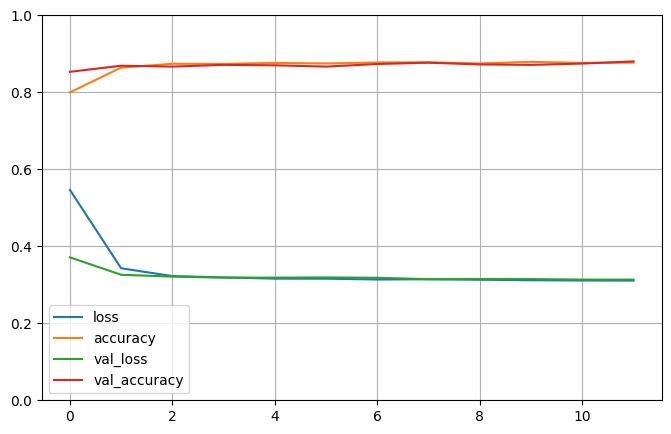

In [158]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()